Rudimentary regression analysis to test the data...

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
df = pd.read_csv('simulated_salary_data.csv')

In [4]:
df

,years_experience,education_level,job_category,company_size,salary,num_employees
0,7,Bachelor,Business Analyst,Large,37995,6215
1,20,Bachelor,Project Manager,Medium,69749,1232
2,15,Bachelor,Project Manager,Medium,62176,1364
3,11,Master,QA Engineer,Large,49238,6769
4,8,Bachelor,Business Analyst,Small,39353,471
...,...,...,...,...,...,...
14995,17,PhD,Data Analyst,Medium,64962,1264
14996,18,Master,Software Developer,Medium,55357,1755
14997,2,PhD,Project Manager,Large,51628,4809
14998,3,PhD,Software Developer,Medium,45958,998


In [5]:
df.describe()

,years_experience,salary,num_employees
count,15000.000000,15000.000000,15000.000000
mean,10.596533,57919.344000,2491.658867
std,5.768891,11504.881416,2823.775640
min,1.000000,24587.000000,50.000000
25%,6.000000,49664.750000,388.750000
50%,11.000000,57829.000000,1237.000000
75%,16.000000,65932.750000,4013.000000
max,20.000000,95751.000000,9998.000000


In [6]:
# new column, to decide if education beyod bachelors matters...
df['has_higher_studies'] = np.where(df['education_level'] != 'Bachelor', 1, 0)

In [7]:
# find out how salary changes as a function of experience and education
X = df[['years_experience', 'has_higher_studies']] 
y = df['salary'] 

In [8]:
# Calculate average salaries
avg_salary_bachelor = df[df['has_higher_studies'] == 0]['salary'].mean()
avg_salary_higher = df[df['has_higher_studies'] == 1]['salary'].mean()

In [9]:
# check what the dataframe looks like now...
df.head()

,years_experience,education_level,job_category,company_size,salary,num_employees,has_higher_studies
0,7,Bachelor,Business Analyst,Large,37995,6215,0
1,20,Bachelor,Project Manager,Medium,69749,1232,0
2,15,Bachelor,Project Manager,Medium,62176,1364,0
3,11,Master,QA Engineer,Large,49238,6769,1
4,8,Bachelor,Business Analyst,Small,39353,471,0


In [10]:
# ye bhee kar ke dekh lo...
df.describe()

,years_experience,salary,num_employees,has_higher_studies
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,10.596533,57919.344000,2491.658867,0.751867
std,5.768891,11504.881416,2823.775640,0.431944
min,1.000000,24587.000000,50.000000,0.000000
25%,6.000000,49664.750000,388.750000,1.000000
50%,11.000000,57829.000000,1237.000000,1.000000
75%,16.000000,65932.750000,4013.000000,1.000000
max,20.000000,95751.000000,9998.000000,1.000000


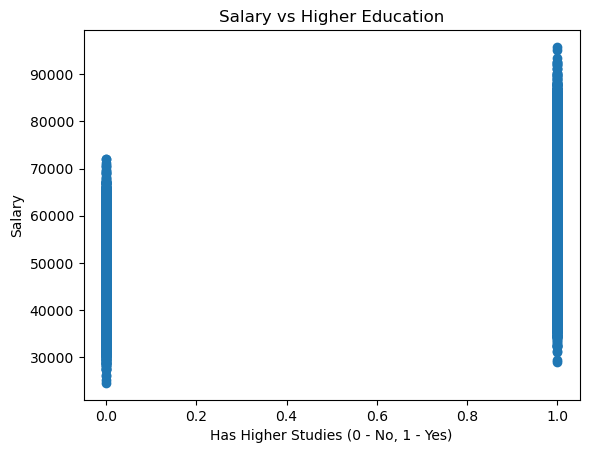

In [11]:
# I don't know why I am creating a scatter plot...
# it's likely not going to show anything meaningful
# try to check the correlation between higher studies and salar
plt.scatter(df['has_higher_studies'], df['salary'])
plt.xlabel('Has Higher Studies (0 - No, 1 - Yes)')
plt.ylabel('Salary')
plt.title('Salary vs Higher Education')
plt.show()

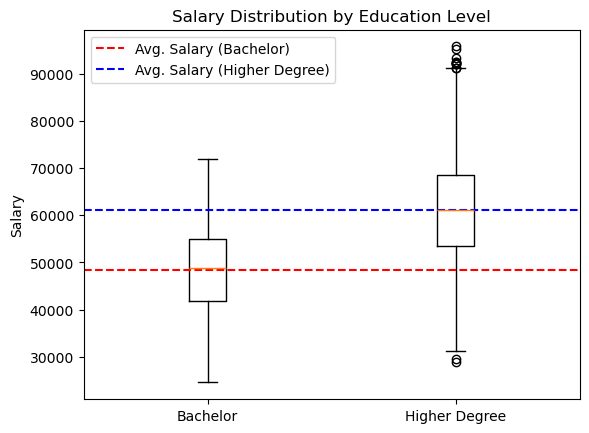

In [12]:
# idhar jyada samjhega
plt.boxplot([df[df['has_higher_studies'] == 0]['salary'], 
             df[df['has_higher_studies'] == 1]['salary']],
            labels=['Bachelor', 'Higher Degree'])
plt.axhline(y=avg_salary_bachelor, 
            color='r', 
            linestyle='--', 
            label='Avg. Salary (Bachelor)')
plt.axhline(y=avg_salary_higher, 
            color='b', 
            linestyle='--', 
            label='Avg. Salary (Higher Degree)')
plt.ylabel('Salary')
plt.legend() 
plt.title('Salary Distribution by Education Level')
plt.show() 

In [13]:
# Life, universe and everthing...
# keep 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [14]:
# fit, then predict...
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
# how did we do?
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 53741897.25804489
R-squared: 0.5914327379648807


In [18]:
# Coefficients and Intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 1206.7534486  12511.82866321]
Intercept: 35754.68198338969


In [19]:
# residuals should look like equally distributed in random data
# # ours is simulated, congratulations... :P
residuals = y_test - y_pred  # Calculate residuals 
# 

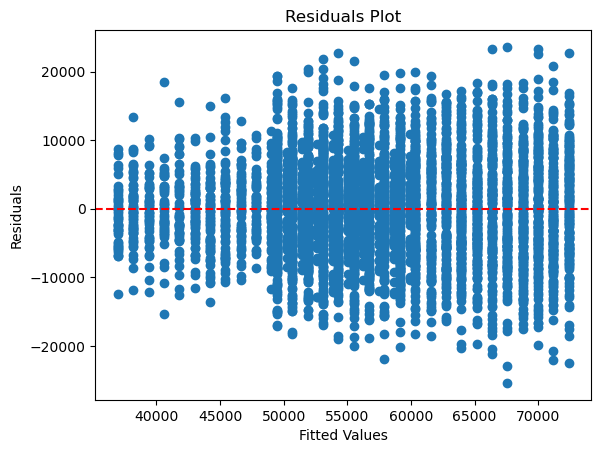

In [20]:
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--') # Adds a reference line
plt.show()

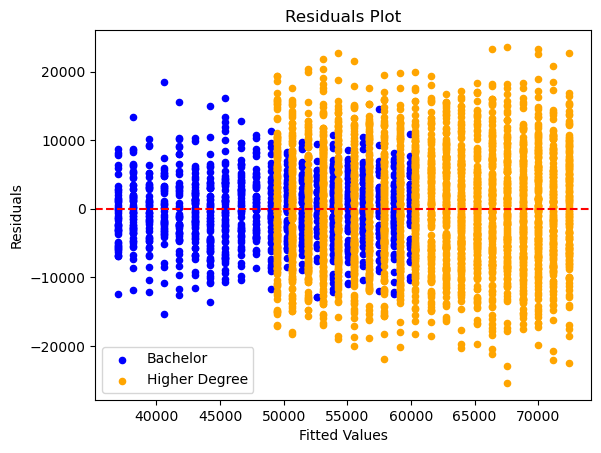

In [21]:
# fancy
# doing predict again, so it matches the shape (or number of rows)
# 
# ignore warnings...we just need signal, no noise...
warnings.filterwarnings('ignore')
# 
plt.scatter(model.predict(X_test[df['has_higher_studies'] == 0]), 
            residuals[df['has_higher_studies'] == 0], 
            s=20,  # Control dot size
            color='blue', label='Bachelor')

plt.scatter(model.predict(X_test[df['has_higher_studies'] == 1]), 
            residuals[df['has_higher_studies'] == 1], 
            s=20, 
            color='orange', label='Higher Degree')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend() 
plt.show()

Seems like our data kinda works...  
padhe likhe log jyada paisa kamate hain...

In [22]:
# another way to do it, not doing it for now...
# model_ols = sm.OLS(y_train, X_train).fit()

In [23]:
# dir(model_ols)

In [24]:
# print(model_ols.summary())
# 'has_higher_studies' - 
# positive value indicates a trend 
# of higher salaries associated with higher degrees

In [25]:
# # residuals should look like equally distributed in random data
# # ours is simulated, congratulations... :P
# residuals = model_ols.resid 

# plt.scatter(model_ols.fittedvalues, residuals)
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals Plot')
# plt.axhline(y=0, color='r', linestyle='--') # Adds a reference line
# plt.show()